# Quantitative Macroeconomics: Homework 5
Marta Oliva Riera

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Factor input misallocation

I answer this question directly for all three possible cases of different correlations ($ \rho = 0, \rho = 0.5, \rho = -0.5 $).
The first thing I do is generate the population observations for the logged capital and productivity ($ln(k_i), ln(z_i)$) from a multivariate normal distribution, obtain the corresponding levels for firm specific capital and productivity and compute the output. 

I first solve the maximization problem below analytically, and obtain the first order condition:

$$ {Max}_{k_i} \Sigma_i z_i k_i^{\gamma} + \lambda ( (\Sigma_i k_i) - K) $$

FOC: $$ - \lambda = z_i \gamma k_i^{\gamma-1}  \forall i$$

Then I put two FOCs together to write any $k_i$ in terms of $k_1$:

$$ k_i = (\frac{z_1}{z_i})^{\frac{1}{\gamma - 1}} k_1 $$

and subsitute it into the constraint to obtain an expression for the efficient $k_1$:

$$ K = k_1 + k_2 + k_3 + ... $$

$$ K = k_1 + (\frac{z_1}{z_2})^{\frac{1}{\gamma - 1}} k_1 + (\frac{z_1}{z_3})^{\frac{1}{\gamma - 1}} k_1 + ... $$

$$ k_1^e = \frac{K}{1 + (\frac{z_1}{z_2})^{\frac{1}{\gamma - 1}} k_1 + (\frac{z_1}{z_3})^{\frac{1}{\gamma - 1}} k_1 + ...} $$

Finally, use $k_1^e$ into the FOCs for every other $k_i$ to get all the efficient capital allocations.

The code below results in histograms showing the distribution of the data generated in each of the three cases, as well as plots showing the difference between the efficient capital and the observed one in the data for each possible correlation. Note that the data distribution is similar, and that the differences between efficient and actual output are mostly positive (the actual output is lower than the efficient one) and present some very large outliers. I comment on the output gains results further down, along with the results of the second question.


Rho = 0


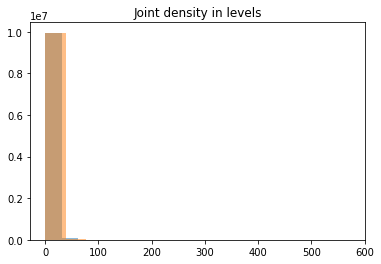

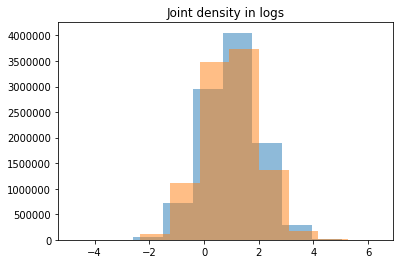

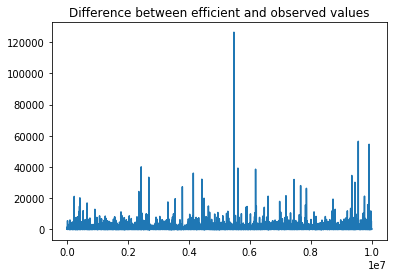

Rho = 0.5


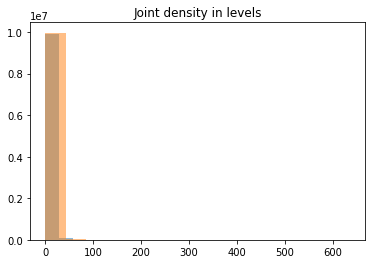

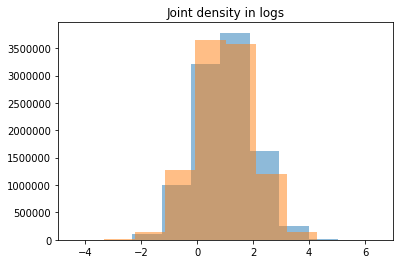

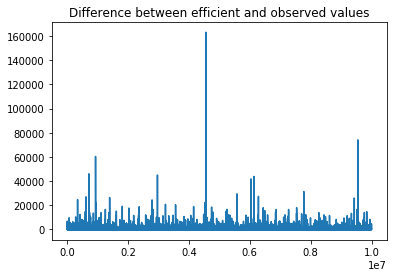

Rho = -0.5


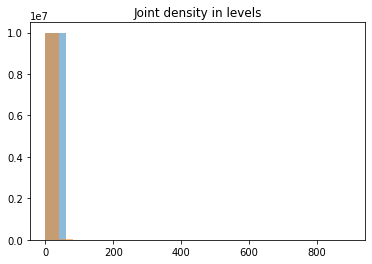

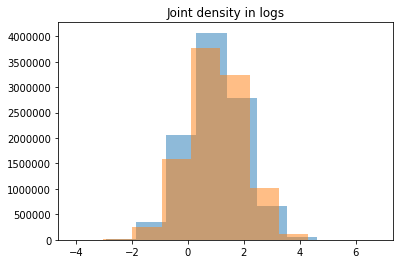

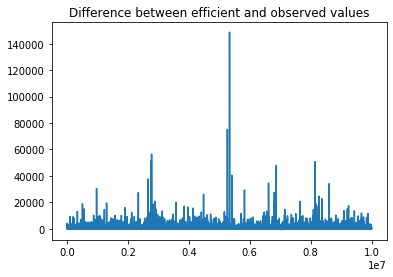

In [2]:
#%% ===========================================================================
# 1. FACTOR INPUT MISALLOCATION
# =============================================================================
ygain1 = np.empty(3) # computing the three correlation cases at the same time
rho = [0,0.5,-0.5]

for ri,r in enumerate(rho):
    print("Rho = " + str(r))
    # 1.1 Simulate the population:
    n = 10000000
    mu = [1, 1]
    sigma = np.array([[1,r], [r,1]])
    X = np.random.multivariate_normal(mu, sigma, n)
    lnk = X[:,0]
    lnz = X[:,1]
    k = np.exp(lnk)
    z = np.exp(lnz)
    
    plt.hist(k, bins=15, alpha = 0.5)
    plt.hist(z, bins=15, alpha = 0.5)
    plt.title('Joint density in levels')
    plt.show()
    
    plt.hist(lnk, alpha = 0.5)
    plt.hist(lnz, alpha = 0.5)
    plt.title('Joint density in logs')
    plt.show()
    
    # 1.2 Output:
    gamma = 0.6
    y = z*((k)**gamma)
    
    # 1.3 Solve the maximization problem of output:
    K = sum(k)  # aggregate capital from the population data
    
    d = np.empty(n)
    kE = np.empty(n)
    
    for i in range(n):
        d[i] = (z[0]/z[i])**(1/(gamma-1))
    
    kE[0] = K/sum(d)
    kE = d*kE[0]
    
    # 1.4 Compare ke to the actual values:
    plt.plot(kE-k)
    plt.title("Difference between efficient and observed values")
    plt.show()
    
    # 1.5 Output gains from relocation:
    Y = sum(y)
    yE = z*((kE)**gamma)
    YE = sum(yE)
    
    ygain1[ri] = ((YE/Y) - 1)*100

## 2. Higher span of control:

Repeating the previous computations with a higher span of control: now $\gamma = 0.8$. The results are summarized and commented in a table below the code.


Ro = 0


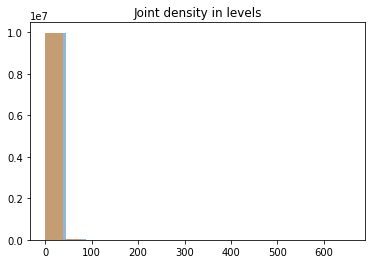

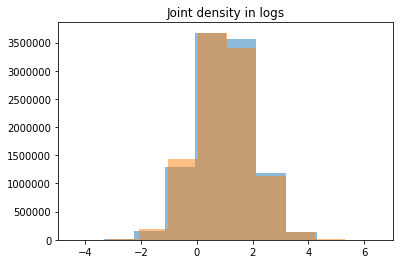

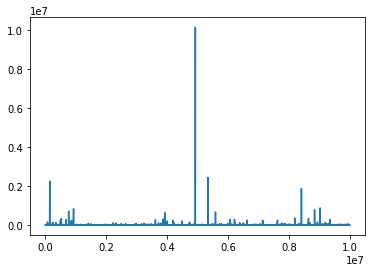

Ro = 0.5


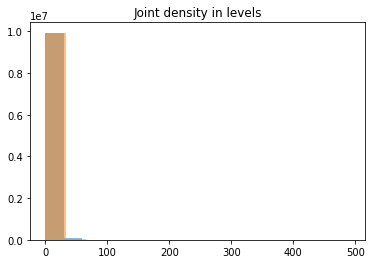

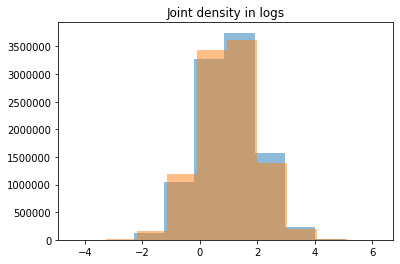

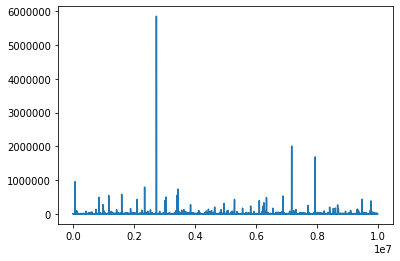

Ro = -0.5


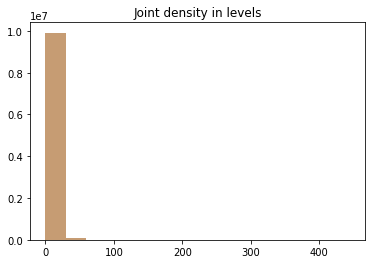

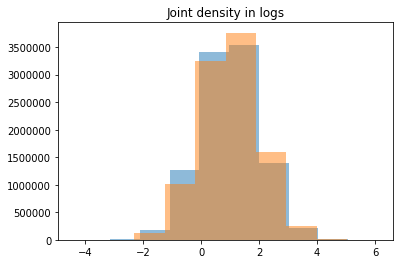

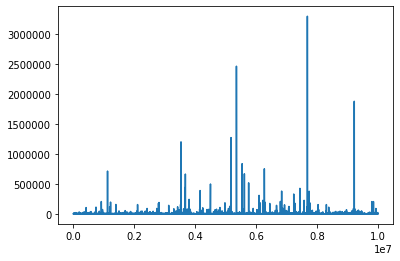

In [3]:
#%% ===========================================================================
# 2. HIGHER SPAN OF CONTROL
# =============================================================================
# Repeat everything with a higher span of control value, now gamma = 0.8
ygain2 = np.empty(3) # computing the three correlation cases at the same time
ro = [0,0.5,-0.5]
for ri,r in enumerate(ro):
    print("Ro = " + str(r))
    # 1.1 Simulate the population:
    n = 10000000
    mu = [1, 1]
    sigma = np.array([[1,r], [r,1]])
    X = np.random.multivariate_normal(mu, sigma, n)
    lnk = X[:,0]
    lnz = X[:,1]
    k = np.exp(lnk)
    z = np.exp(lnz)
    
    plt.hist(k, bins=15, alpha = 0.5)   # this one doesn't look great but not sure how to fix it
    plt.hist(z, bins=15, alpha = 0.5)
    plt.title('Joint density in levels')
    plt.show()
    
    plt.hist(lnk, alpha = 0.5)
    plt.hist(lnz, alpha = 0.5)
    plt.title('Joint density in logs')
    plt.show()
    
    # 1.2 Output:
    gamma = 0.8
    y = z*((k)**gamma)
    
    # 1.3 Solve the maximization problem of output:
    K = sum(k)  # aggregate capital from the population data
    
    d = np.empty(n)
    kE = np.empty(n)
    
    for i in range(n):
        d[i] = (z[0]/z[i])**(1/(gamma-1))
    
    kE[0] = K/sum(d)
    kE = d*kE[0]
    
    # 1.4 Compare ke to the actual values:
    plt.plot(kE-k)
    plt.show()
    
    # 1.5 Output gains from relocation:
    Y = sum(y)
    yE = z*((kE)**gamma)
    YE = sum(yE)
    
    ygain2[ri] = ((YE/Y) - 1)*100

The results for the output gains from relocation of capital for each of the previously computed cases are presented in the table below. When $\gamma = 0.6$, when there is no correlation between $ln k_i$ and $ln z_i$, there would be 138% increased output if capital was efficiently relocated. Having positive correlation decreases the output gains to 77%, while a negative correlation increases them to 222%. 

A similar pattern can be observed for the case where $\gamma = 0.8$, but with notably larger output gains: in the no correlation case, relocating capital efficiently would increase output by 649%.

In [4]:
#%% Table summarizing all output gains in Q1 + Q2:
# -----------------------------------------------------------------------------
YGain = {'Output gains': ['gamma = 0.6', 'gamma = 0.8'], 'ro = 0': [ygain1[0], ygain2[0]], 'ro = 0.5': [ygain1[1], ygain2[1]], 'ro = -0.5': [ygain1[2], ygain2[2]]}
df1 = pd.DataFrame(YGain)
print(df1)

  Output gains      ro = 0    ro = 0.5   ro = -0.5
0  gamma = 0.6  138.535702   77.230237  222.782824
1  gamma = 0.8  649.615671  376.279587  974.095939


## 3. From complete distributions to random samples:

#### 3.1 Sample the population:
Now we are assuming that we do not have access to the whole population, and we can only observe samples from it. Taking the previously generated data as the unobserved population, I draw a sample of size 10000 without replacement, and compute the variance of $ln k_i$ and $ln z_i$ in the sample as well as their correlation in the sample.

As can be seen in the results printed below, the variances (in the diagonal of the variance-covariance matrix) are close to 1, while the covariance is close to 0, just like they were for the entrie population. 

In [5]:
#%% ===========================================================================
# 3. FROM COMPLETE DISTRIBUTIONS TO RANDOM SAMPLES
# =============================================================================
# 3.1 Take a sample of 10000 observations from the population:
# -----------------------------------------------------------------------------
# Resetting the population values to those with no correlation:
n = 10000000
ro = 0
mu = [1, 1]
sigma = np.array([[1,ro], [ro,1]])
X = np.random.multivariate_normal(mu, sigma, n)
lnk = X[:,0]
lnz = X[:,1]
k = np.exp(lnk)
z = np.exp(lnz)

# Take the random sample:
from numpy.random import choice
m = 10000
lnkS = choice(lnk, m)
kS = np.exp(lnkS)
lnzS = choice(lnz, m)
zS = np.exp(lnzS)

# Check the variance and covariance of the sample:
roS = np.cov(lnkS, lnzS)
print("The variance-covariance matrix of the sample is: " + str(roS))


The variance-covariance matrix of the sample is: [[ 1.00384917 -0.01188735]
 [-0.01188735  0.98654738]]


#### 3.2 Output gains with the sample:

Recomputing the efficient capital values and the output gain from relocation with the sample values results in an output gain of 137%, which is very close to the population output gain of 138%. 

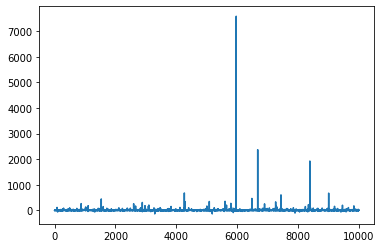

137.94548091845033


In [8]:
# 3.2 Recompute 1.3-1.5 with the sample:
# -----------------------------------------------------------------------------
# 1.3 Solve the maximization problem of output:
gamma = 0.6
KS = sum(kS)  
d = np.empty(m)
kES = np.empty(m)

for i in range(m):
    d[i] = (zS[0]/zS[i])**(1/(gamma-1))

kES[0] = KS/sum(d)
kES = d*kES[0]

# 1.4 Compare ke to the actual values:
plt.plot(kES-kS)
plt.show()

# 1.5 Output gains from relocation:
yS = zS*((kS)**gamma)
YS = sum(yS)
yES = zS*((kES)**gamma)
YES = sum(yES)

ygainS = ((YES/YS) - 1)*100
print(ygainS)

#### 3.3 Take 1000 different samples:

Repeating the previous process 1000 times to get different random samples from the population and therefore different measures of output gains from relocation. The output gains are plotted in a histogram below and summary statistics are also presented.

It is clear that with 1000 samples the mean of the output gains becomes closer to that of the entire population, and that most samples have output gains concentrated arond the true population value.

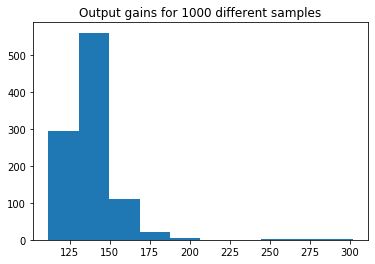

                 0
count  1000.000000
mean    138.881440
std      16.433903
min     111.555942
25%     129.468900
50%     136.346983
75%     143.817565
max     301.594366


In [9]:
# 3.3 Repeat the two previous steps 1000 times, to get different measures of misallocation:
# -----------------------------------------------------------------------------------------
N = 1000
ygainS = np.empty(N)

for j in range(N):
    # 3.1 Get a new random sample:
    lnkS = choice(lnk, m)
    kS = np.exp(lnkS)
    lnzS = choice(lnz, m)
    zS = np.exp(lnzS)
    # 3.2 Efficient output and output gains:
    KS = sum(kS)  
    d = np.empty(m)
    kES = np.empty(m)
    
    for i in range(m):
        d[i] = (zS[0]/zS[i])**(1/(gamma-1))
    
    kES[0] = KS/sum(d)
    kES = d*kES[0]
                                # skipping the plotting here because it'd take too long
    yS = zS*((kS)**gamma)
    YS = sum(yS)
    yES = zS*((kES)**gamma)
    YES = sum(yES)
    
    ygainS[j] = (YES/YS - 1)*100

plt.hist(ygainS)
plt.title("Output gains for 1000 different samples")
plt.show()
ygdf = pd.DataFrame(ygainS)
print(ygdf.describe())

#### 3.4 Probability:

The probability that the output gains we observe when taking 1000 samples of 10000 observations each will be 10% above or below the actual output gain for the population can easily be computed as I do below. In this case, there is a 79.4% probability that the output gains computed will be in an interval of 10% around the true value.


In [10]:
# 3.4 Probability that output gain from the samples is within 10% of the actual output gain:
# --------------------------------------------------------------------------------------------
# create an interval of +-10% around output gains from the population:
LB = 0.9*ygain1[0]
UB = 1.1*ygain1[0]

# count the amount of times the output gain in the sample is within the interval:
count = 0
for i in ygainS:
    if (i>=LB) and (i<=UB):
        count += 1

# compute the probability:
prob = (count/N)*100
print("Probability of being in a 10% interval of the actual output gains: " + str(prob) +" %")

Probability of being in a 10% interval of the actual output gains: 79.4 %


#### 3.5 Repeat with different sample-to-population ratios:

The code below repeats the previous computations with four different sample sizes: 100, 1000, 10000 and 100000. For each case I print out a histogram with the distribution of output gains, summary statistics and the probability of being in a 10% interval around the actual output gains. I summarize and comment on these results below.

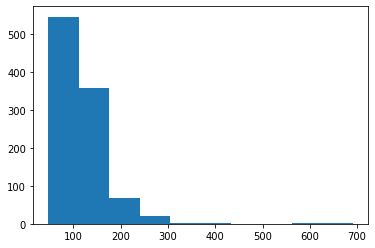

Descriptive statistics:                  0
count  1000.000000
mean    131.032627
std      95.495441
min       0.000000
25%       0.358513
50%     186.041423
75%     210.264079
max     225.856168
Probability of being in a 10% interval of the actual output gains: 17.599999999999998 %


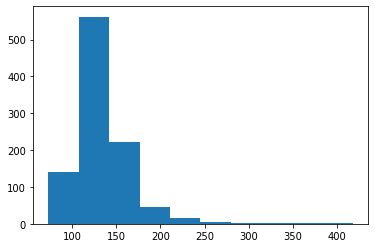

Descriptive statistics:                    0
count   1.000000e+03
mean    1.310521e+02
std     9.552236e+01
min   -1.086651e-310
25%     3.660534e-01
50%     1.861784e+02
75%     2.102489e+02
max     2.258257e+02
Probability of being in a 10% interval of the actual output gains: 35.699999999999996 %


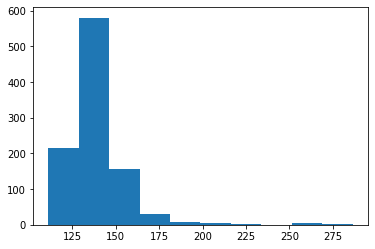

Descriptive statistics:                 0
count  998.000000
mean   131.489642
std     95.378326
min      0.000000
25%      0.370070
50%    186.650211
75%    210.263278
max    226.038804
Probability of being in a 10% interval of the actual output gains: 73.9 %


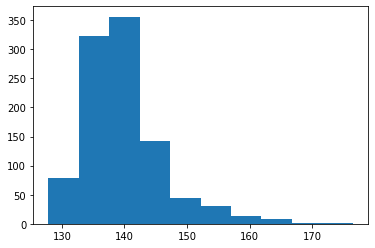

Descriptive statistics:                    0
count   1.000000e+03
mean    1.312588e+02
std     9.547358e+01
min   -1.032328e-310
25%     3.536759e-01
50%     1.863306e+02
75%     2.102678e+02
max     2.259170e+02
Probability of being in a 10% interval of the actual output gains: 94.69999999999999 %


In [11]:
#%% 3.5 Repeat with different sample-to-population ratios:
#------------------------------------------------------------------------------
samplesize = [100, 1000, 10000, 100000]
N = 1000
ygainS = np.empty([1000,4])
prob = np.empty(4)
yg = np.empty([N,4])

for si, s in enumerate(samplesize):
    # 3.3 Repeat 1000 times to get different measures of output gains from relocation:
    for j in range(N):
        # 3.1 Get a new random sample:
        lnkS = choice(lnk, s)
        kS = np.exp(lnkS)
        lnzS = choice(lnz, s)
        zS = np.exp(lnzS)
        # 3.2 Efficient output and output gains:
        KS = sum(kS)  
        d = np.empty(s)
        kES = np.empty(s)
        
        for i in range(s):
            d[i] = (zS[0]/zS[i])**(1/(gamma-1))
        
        kES[0] = KS/sum(d)
        kES = d*kES[0]

        yS = zS*((kS)**gamma)
        YS = sum(yS)
        yES = zS*((kES)**gamma)
        YES = sum(yES)
        
        ygainS[j,si] = (YES/YS - 1)*100
    # Plot the output gains for the different random samples + print descriptive statistics:
    plt.hist(ygainS[:,si])
    plt.show()
    print("Descriptive statistics: " + str(pd.DataFrame(yg[:,si]).describe()))
    
    #3.4 Probability that output gain from the samples is within 10% of the actual output gain:
    # create an interval of +-10% around output gains from the population:
    LB = 0.9*ygain1[0]
    UB = 1.1*ygain1[0]
    # count the amount of times the output gain in the sample is within the interval:
    count = 0
    for i in ygainS[:,si]:
        if (i>=LB) and (i<=UB):
            count += 1
    # compute the probability:
    prob[si] = (count/N)*100
    print("Probability of being in a 10% interval of the actual output gains: " + str(prob[si]) +" %")


Below is a histogram with all distributions of output gains for each of the sample sizes, to make them more easily comparable. It is easy to see there that the largest the sample size, the more closely distributed around the actual value of output gains the observations from the sample are. 

This is backed also by the fact that the mean of output gains increases with sample size, and its' variance is notably decreased, as can be seen on the table. It is also worth noting that the probability of being in an interval of 10% around the actual value of output gains increases with sample size. In fact, it goes from a 17.6% probability for samples with a 100 observations to 94.7% for the samples with 100000 observations. That makes it clear that using samples instead of the whole population produces very close measures to the population ones as long as the samples are as large as possible.

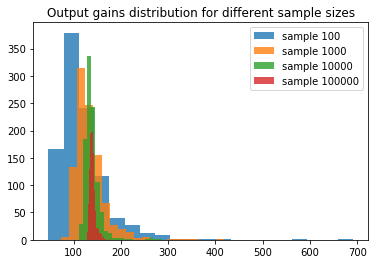

           Results      s = 100     s = 1000   s = 10000  s = 100000
0             Mean   117.653615   134.646537  139.074556  139.795145
1         Variance  2770.245841  1074.057983  309.923339   39.271980
2  Probability 10%    17.600000    35.700000   73.900000   94.700000


In [12]:
#%% Summary of the results:
plt.hist(ygainS[:,0], bins=20, label='sample 100', alpha=0.8)
plt.hist(ygainS[:,1], bins=20, label='sample 1000', alpha=0.8)
plt.hist(ygainS[:,2], bins=20, label='sample 10000', alpha=0.8)
plt.hist(ygainS[:,3], bins=20, label='sample 100000', alpha=0.8)
plt.title("Output gains distribution for different sample sizes")
plt.legend()
plt.show()

YGainSamples = {'Results': ['Mean', 'Variance', 'Probability 10%'], 's = 100': [np.mean(ygainS[:,0]), np.var(ygainS[:,0]), prob[0]], 's = 1000': [np.mean(ygainS[:,1]), np.var(ygainS[:,1]), prob[1]], 's = 10000': [np.mean(ygainS[:,2]), np.var(ygainS[:,2]), prob[2]], 's = 100000': [np.mean(ygainS[:,3]), np.var(ygainS[:,3]), prob[3]]}
df2 = pd.DataFrame(YGainSamples)
print(df2)